# 1. Importation des librairies et jeu de donnée

In [1]:
# Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import wordnet
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

#python librairies

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importation du fichier test

df ='/content/drive/MyDrive/df_cleaned.csv'
df = pd.read_csv(df, index_col=False)


In [4]:
df.head()

,Tags,Body,Title
0,"['php', 'laravel', 'laravel', 'laravel', 'requ...","['want', 'run', 'form', 'submit', 'however', '...","['exclude', 'laravel', 'specific', 'value', 'r..."
1,"['java', 'private', 'public', 'protect', 'acce...","['java', 'clear', 'rule', 'use', 'access', 'mo...","['difference', 'public', 'protect', 'package',..."
2,"['python', 'numpy', 'machine', 'learn', 'scipy...","['try', 'principal', 'component', 'analysis', ...","['principal', 'component', 'analysis', 'work']"
3,"['c#', 'net', 'm', 'word', 'docx', 'doc']","['load', 'm', 'word', 'document', 'doc', 'docx...","['load', 'text', 'm', 'word', 'document', 'c#'..."
4,"['visual', 'studio', 'visual', 'studio', 'visu...","['hard', 'would', 'use', 'gcc', 'instead', 'vc...","['gcc', 'visual', 'studio']"


In [5]:
df.shape

(3453, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tags    3453 non-null   object
 1   Body    3453 non-null   object
 2   Title   3453 non-null   object
dtypes: object(3)
memory usage: 81.1+ KB


In [6]:
# Your preprocessing function
def words_tokenize(text):
    text = text.split()  # Split into words
    return text

In [7]:
# Apply tokenization to create the 'Text' column
df['Text'] = df['Body'].apply(lambda x: ''.join(x)) + " " + df['Title'].apply(lambda x: ''.join(x))
df['Text'] = df.Text.apply(lambda text: ''.join(words_tokenize(text)))


In [8]:
df.head()

,Tags,Body,Title,Text
0,"['php', 'laravel', 'laravel', 'laravel', 'requ...","['want', 'run', 'form', 'submit', 'however', '...","['exclude', 'laravel', 'specific', 'value', 'r...","['want','run','form','submit','however','retur..."
1,"['java', 'private', 'public', 'protect', 'acce...","['java', 'clear', 'rule', 'use', 'access', 'mo...","['difference', 'public', 'protect', 'package',...","['java','clear','rule','use','access','modifie..."
2,"['python', 'numpy', 'machine', 'learn', 'scipy...","['try', 'principal', 'component', 'analysis', ...","['principal', 'component', 'analysis', 'work']","['try','principal','component','analysis','dat..."
3,"['c#', 'net', 'm', 'word', 'docx', 'doc']","['load', 'm', 'word', 'document', 'doc', 'docx...","['load', 'text', 'm', 'word', 'document', 'c#'...","['load','m','word','document','doc','docx','me..."
4,"['visual', 'studio', 'visual', 'studio', 'visu...","['hard', 'would', 'use', 'gcc', 'instead', 'vc...","['gcc', 'visual', 'studio']","['hard','would','use','gcc','instead','vc++','..."


# 2. Modèle Non supervisé


Le modèle LDA (Latent Dirichlet Allocation) est une technique de reduction des dimentionnalités qui permet de découvrir les sujets cachés à partir d'un ensemble de documents. Le modèle suppose que chaque document est une combinaison de plusieurs sujets, et chaque sujet est une combinaison de plusieurs mots.

In [9]:
# Import the required module
from gensim import corpora
import re

# Create a list of lists of tokens from the 'Text' column in your DataFrame
tokenized_texts = [re.findall(r'\w+', text) for text in df['Text']]

# Create a Dictionary
dictionary = corpora.Dictionary(tokenized_texts)

# Create a Corpus
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# View
print(corpus[:1][0][:30])


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1)]


Liste d'éléments dans le format (id du mot, fréquence d'apparition) pour le premier document (texte) de notre corpus.

In [10]:
import gensim

# Train the LDA model
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=42,
                                       passes=10,
                                       )

In [ ]:
# Analyse des résultats : print des mots les plus important pour chaque topic

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.021*"use" + 0.016*"work" + 0.009*"like" + 0.009*"try" + 0.009*"file" + 0.009*"run" + 0.008*"problem" + 0.008*"code" + 0.007*"get" + 0.006*"test"
Topic: 1 
Words: 0.028*"test" + 0.012*"get" + 0.012*"core" + 0.012*"use" + 0.012*"run" + 0.011*"work" + 0.011*"java" + 0.010*"try" + 0.010*"method" + 0.009*"error"
Topic: 2 
Words: 0.029*"file" + 0.025*"image" + 0.016*"use" + 0.012*"text" + 0.009*"line" + 0.008*"want" + 0.008*"html" + 0.007*"way" + 0.006*"like" + 0.006*"set"
Topic: 3 
Words: 0.011*"java" + 0.009*"mongodb" + 0.007*"app" + 0.007*"spring" + 0.006*"xcode" + 0.006*"use" + 0.006*"bean" + 0.006*"com" + 0.006*"property" + 0.005*"set"
Topic: 4 
Words: 0.023*"use" + 0.013*"get" + 0.012*"table" + 0.012*"data" + 0.011*"value" + 0.010*"like" + 0.010*"try" + 0.009*"work" + 0.007*"field" + 0.007*"model"
Topic: 5 
Words: 0.020*"use" + 0.011*"get" + 0.010*"app" + 0.010*"file" + 0.008*"try" + 0.007*"memory" + 0.007*"run" + 0.007*"set" + 0.007*"way" + 0.006*"need"
Topic: 6 
Wo

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
# Créer un objet CoherenceModel
coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')

# Calculer et afficher la cohérence
coherence_score = coherence_model.get_coherence()
print('\nCoherence Score: ', round(coherence_score, 2))


Coherence Score:  0.33


Nous souhaitons optimiser notre modèle pour cela nous devons optimiser les hyperparamètres de ce dernier:

- **K, num_topics (nombre de sujets)** : C'est le nombre de sujets que vous souhaitez extraire à partir de vos données. Chaque sujet est une combinaison de mots, et un document peut être décrit par une distribution de sujets. Il s'agit d'un hyperparamètre crucial et doit être choisi en fonction de votre connaissance du domaine et de la nature des données.

- **passes (itérations)** : Le nombre d'itérations ou de passages que le modèle effectue sur l'ensemble des données. Plus le nombre de passages est élevé, plus le modèle a de chances de découvrir des relations dans les données. Cependant, cela peut aussi rendre l'entraînement plus lent.

- **Hyperparamètre de Dirichlet α** : paramètre de densité document-topic

- **Hyperparamètre de Dirichlet η** : paramètre de densité de mots-topic

Ce sont les hyperparamètres de la distribution de Dirichlet, qui contrôle la répartition des sujets dans les documents et des mots dans les sujets respectivement. Une valeur plus élevée d'alpha rend les documents plus similaires en termes de sujets, tandis qu'une valeur plus élevée d'eta rend les sujets plus similaires en termes de mots.

L'optimisation bayésienne est un moyen efficace de trouver les meilleures combinaisons de paramètres d'un modèle en minimisant le nombre d'essais nécessaires. Pour cela, nous allons utiliser la bibliothèque "scikit-optimize" (skopt) qui propose des outils pour l'optimisation bayésienne.

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from gensim import corpora
import gensim
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [ ]:
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from hyperopt import fmin, tpe, hp

def objective(params):
    num_topics = int(params['num_topics'])
    passes = int(params['passes'])
    alpha = params['alpha']
    eta = params['eta']



    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Return the negative coherence score (since we want to maximize coherence)
    return -coherence_score

param_space = {
    'num_topics': hp.quniform('num_topics', 2, 20, 1),
    'passes': hp.quniform('passes', 5, 50, 1),
    'alpha': hp.uniform('alpha', 0.1, 10),
    'eta': hp.uniform('eta', 0.01, 1)
}

best = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=50)
print("Best hyperparameters:", best)

100%|██████████| 50/50 [02:09<00:00,  2.60s/trial, best loss: -0.32797009154305695]
Best hyperparameters: {'alpha': 3.5933687663788616, 'eta': 0.8531110485665984, 'num_topics': 19.0, 'passes': 31.0}


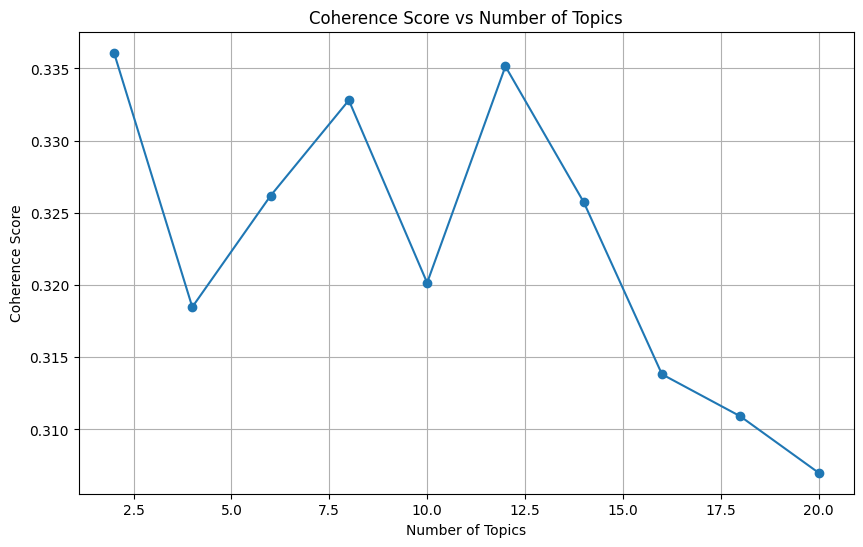

In [ ]:
# Define the list of num_topics values to test
num_topics_values = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['num_topics', 'coherence_score'])

# Iterate over different num_topics values
for num_topics in num_topics_values:
    # Train the LDA model
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Store the results in the DataFrame
    results_df = results_df.append({'num_topics': num_topics, 'coherence_score': coherence_score}, ignore_index=True)

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_topics'], results_df['coherence_score'], marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.grid(True)
plt.show()

In [ ]:
pip install pyLDAvis --upgrade


In [ ]:
pip install gensim pyLDAvis


In [ ]:
!pip install pandas==1.5.3

In [ ]:
import joblib
import pyLDAvis
import gensim
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# train the model with optimal parameters
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=14, random_state=42,
                                passes=16, alpha= 0.37, eta=0.66)
# Enable notebook mode for pyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
import random

# Sélectionnez 10 indices d'échantillons aléatoires
sample_indices = random.sample(range(len(corpus)), 10)

for i in sample_indices:
    print(f"Question {i+1}:")
    topic_keywords = lda_model.show_topic(lda_model[corpus[i]][0][0], topn=10)  # Utilisez l'indice i pour obtenir le sujet du modèle LDA
    keywords = [word for word, _ in topic_keywords]
    print("Keywords:", ", ".join(keywords))
    print()


Question 3426:
Keywords: use, file, get, like, way, would, string, data, time, memory

Question 1683:
Keywords: use, file, get, like, way, would, string, data, time, memory

Question 2785:
Keywords: use, get, like, user, table, data, database, try, work, net

Question 1109:
Keywords: use, get, like, user, table, data, database, try, work, net

Question 838:
Keywords: use, work, file, run, try, get, code, app, test, like

Question 2355:
Keywords: class, method, code, object, call, thread, use, event, list, test

Question 2737:
Keywords: use, work, file, run, try, get, code, app, test, like

Question 459:
Keywords: use, work, file, run, try, get, code, app, test, like

Question 846:
Keywords: use, file, get, like, way, would, string, data, time, memory

Question 1194:
Keywords: use, work, file, run, try, get, code, app, test, like



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Obtain topic distributions for each document
topic_dist = pd.DataFrame(lda_model.get_document_topics(corpus, minimum_probability=0.0))
for topic in topic_dist.columns:
    topic_dist[topic] = topic_dist[topic].apply(lambda x : x[1])

print('matrix of document/topic distribution shape:', topic_dist.shape)

matrix of document/topic distribution shape: (3453, 10)


In [12]:
topic_dist.head()

,0,1,2,3,4,5,6,7,8,9
0,0.004362,0.004362,0.004362,0.004362,0.565130,0.004362,0.004363,0.004362,0.226517,0.177817
1,0.004765,0.545541,0.004765,0.004766,0.004765,0.004765,0.004768,0.004766,0.004766,0.416333
2,0.001222,0.001221,0.163930,0.001222,0.001222,0.826297,0.001222,0.001222,0.001221,0.001222
3,0.002224,0.085121,0.229555,0.218177,0.002224,0.002225,0.002225,0.002225,0.002224,0.453800
4,0.003574,0.003573,0.003573,0.003573,0.003573,0.003574,0.003574,0.855014,0.003575,0.116396


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer


# Multilabel binarizer for targets
y = df['Tags']

# Split tags and count their frequencies
tag_counts = {}
for tags in y:
    for tag in tags.split():
        tag_counts[tag] = tag_counts.get(tag, 0) + 1

# Select the top 100 most frequent tags
top_tags = sorted(tag_counts, key=tag_counts.get, reverse=True)[:100]

# Filter and transform tags using the selected top tags
tags_list_filtered = [[tag for tag in tags.split() if tag in top_tags] for tags in y]

# Initialize and fit the multilabel binarizer
multilabel_binarizer = MultiLabelBinarizer(classes=top_tags)
y = multilabel_binarizer.fit_transform(tags_list_filtered)

# Create train and test split (25%)
X_train, X_test, y_train, y_test = train_test_split(topic_dist, y,
                                                    test_size=0.25, random_state=42)
print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))


X_train shape : (2589, 10)
X_test shape : (864, 10)
y_train shape : (2589, 100)
y_test shape : (864, 100)


In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score, average_precision_score, jaccard_score
from sklearn.model_selection import GridSearchCV
import time
import pandas as pd

# Define the models and hyperparameters
models = {
    'OneVsRestSvc': {'estimator': OneVsRestClassifier(SVC()),
                     'params': {}}
}

# Define the scoring metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1-Score': make_scorer(f1_score, average='weighted'),
    'MAP': make_scorer(average_precision_score, average='weighted'),
    'Jaccard': make_scorer(jaccard_score, average='weighted')
}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_Accuracy', 'Train_Recall', 'Train_F1-Score', 'Train_Jaccard',
                                'Val_Accuracy', 'Val_Recall', 'Val_F1-Score', 'Val_Jaccard', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=3, scoring=scoring, refit='Jaccard', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_Accuracy': grid_search.cv_results_['mean_train_Accuracy'][grid_search.best_index_],
                              'Train_Recall': grid_search.cv_results_['mean_train_Recall'][grid_search.best_index_],
                              'Train_F1-Score': grid_search.cv_results_['mean_train_F1-Score'][grid_search.best_index_],
                              'Train_Jaccard': grid_search.cv_results_['mean_train_Jaccard'][grid_search.best_index_],
                              'Val_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
                              'Val_Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
                              'Val_F1-Score': grid_search.cv_results_['mean_test_F1-Score'][grid_search.best_index_],
                              'Val_Jaccard': grid_search.cv_results_['mean_test_Jaccard'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation MAP score and fitting time
results = results.sort_values(by=['Val_Jaccard', 'Fit_time'], ascending=[False, True])

# Print the results
results


,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,OneVsRestSvc,{},0.074932,0.0,0.0,0.0,0.074932,0.0,0.0,0.0,28.348471


In [15]:
df_results = results

#3. Modèles supervisés

## 3.1 Méthode Bag of word, TF-IDF

TF-IDF signifie « Term Frequency-Inverse Document Frequency » en français. C'est une représentation numérique utilisée en traitement automatique du langage naturel (TALN) et en recherche d'informations pour évaluer l'importance des mots (termes) dans un document par rapport à une collection de documents.

L'idée principale derrière le TF-IDF est d'accorder des poids plus élevés aux termes qui apparaissent fréquemment dans un document particulier (fréquence du terme) tout en diminuant leur importance s'ils sont communs à plusieurs documents de la collection (fréquence inverse dans le corpus). Cela permet de mettre en évidence les termes spécifiques à un document et de réduire l'importance des mots courants qui ne sont pas discriminants pour la compréhension du contenu. Le TF-IDF est couramment utilisé dans diverses applications telles que la recherche d'information, la classification de textes et la recommandation de contenu.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the "CountVectorizer" TFIDF for text
X = df["Text"]
vectorizer = TfidfVectorizer(analyzer="word",
                             max_df=0.97,
                             min_df=3,
                             tokenizer=None,
                             preprocessor=''.join,
                             stop_words=None,
                             lowercase=False)

# Fit and transform the data
X_tfidf = vectorizer.fit_transform(X)

# Get the feature names (words) and their corresponding weights
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with the TF-IDF weights
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Display the shape of the DataFrame
print("Shape of X_tfidf:", df_tfidf.shape)


Shape of X_tfidf: (3453, 4102)


In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

# Multilabel binarizer for targets
y = df['Tags']

# Split tags and count their frequencies
tag_counts = {}
for tags in y:
    for tag in tags.split():
        tag_counts[tag] = tag_counts.get(tag, 0) + 1

# Select the top 100 most frequent tags
top_tags = sorted(tag_counts, key=tag_counts.get, reverse=True)[:100]

# Filter and transform tags using the selected top tags
tags_list_filtered = [[tag for tag in tags.split() if tag in top_tags] for tags in y]

# Initialize and fit the multilabel binarizer
multilabel_binarizer = MultiLabelBinarizer(classes=top_tags)
y = multilabel_binarizer.fit_transform(tags_list_filtered)

print("y shape : {}".format(y.shape))


y shape : (3453, 100)


In [18]:
from sklearn.model_selection import train_test_split

# Create train and test split (25%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.25, random_state=42)
print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))


X_train shape : (2589, 4102)
X_test shape : (864, 4102)
y_train shape : (2589, 100)
y_test shape : (864, 100)


Nous remarquons un nombre plus élevé d'exemples d'entraînement (2589) que dans tags (33), cela suggère qu'un ou plusieurs tags peuvent être associés à plusieurs texte. Cela signifie qu'il peut y avoir des documents qui partagent des tags communs.

Cela est courant dans les scénarios de classification multi-étiquettes, où un document peut être associé à plusieurs étiquettes (tags) simultanément.

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score, average_precision_score, jaccard_score
from sklearn.model_selection import GridSearchCV
import time
import pandas as pd

# Define the models and hyperparameters
models = {
    'LogisticRegression': {'estimator': OneVsRestClassifier(LogisticRegression()),
                           'params': {}}
}

# Define the scoring metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1-Score': make_scorer(f1_score, average='weighted'),
    'MAP': make_scorer(average_precision_score, average='weighted'),
    'Jaccard': make_scorer(jaccard_score, average='weighted')
}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_Accuracy', 'Train_Recall', 'Train_F1-Score',  'Train_Jaccard',
                                'Val_Accuracy', 'Val_Recall', 'Val_F1-Score',  'Val_Jaccard', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=3, scoring=scoring, refit='Jaccard', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_Accuracy': grid_search.cv_results_['mean_train_Accuracy'][grid_search.best_index_],
                              'Train_Recall': grid_search.cv_results_['mean_train_Recall'][grid_search.best_index_],
                              'Train_F1-Score': grid_search.cv_results_['mean_train_F1-Score'][grid_search.best_index_],
                              'Train_Jaccard': grid_search.cv_results_['mean_train_Jaccard'][grid_search.best_index_],
                              'Val_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
                              'Val_Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
                              'Val_F1-Score': grid_search.cv_results_['mean_test_F1-Score'][grid_search.best_index_],
                              'Val_Jaccard': grid_search.cv_results_['mean_test_Jaccard'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation MAP score and fitting time
results = results.sort_values(by=['Val_Jaccard', 'Fit_time'], ascending=[False, True])

# Print the results
results


,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,LogisticRegression,{},0.088258,0.06036,0.101908,0.059867,0.083816,0.031791,0.056587,0.031317,16.261033


In [24]:
df_results = df_results.append(results)

In [ ]:
import random
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Définir le modèle avec les paramètres adéquats
clf = OneVsRestClassifier(LogisticRegression())

# Entraînement du modèle
clf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
predicted_tags = clf.predict(X_test)


# Inverse transform the predictions using the original multilabel binarizer
y_pred_inversed = multilabel_binarizer.inverse_transform(predicted_tags)


# Inverse transform the test labels using the original multilabel binarizer
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)


# Supprimer les caractères spéciaux et les espaces inutiles dans les prédictions et les étiquettes
predicted_cleaned = [' '.join(pred).replace("[", "").replace("'", "").replace("\"", "").strip() for pred in y_pred_inversed]
true_cleaned = [' '.join(true).replace("[", "").replace("'", "").replace("\"", "").strip() for true in y_test_inversed]

# Sélectionnez 50 indices aléatoires
random_indices = random.sample(range(len(true_cleaned)), 50)

print("\nPrint 50 random predicted Tags vs true Tags")
print("-" * 100)
for idx in random_indices:
    print("Predicted:", predicted_cleaned[idx])
    print("True:", true_cleaned[idx])
    print("-" * 100)






Print 50 random predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: 
True: language,
----------------------------------------------------------------------------------------------------
Predicted: javascript,
True: javascript, j, node,
----------------------------------------------------------------------------------------------------
Predicted: 
True: python, web, python, x,
----------------------------------------------------------------------------------------------------
Predicted: 
True: angular,
----------------------------------------------------------------------------------------------------
Predicted: 
True: net, c#, json,
----------------------------------------------------------------------------------------------------
Predicted: sql,
True: sql, server, database, sql,
----------------------------------------------------------------------------------------------------
Predicted: 
True: 

Nous voyons que le modèle n'est pas optimal en terme de prediction

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models and hyperparameters
models = {

    'SGDClassifier': {'estimator': OneVsRestClassifier(SGDClassifier()),
                      'params': {}},

}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_Accuracy', 'Train_Recall', 'Train_F1-Score',  'Train_Jaccard',
                                'Val_Accuracy', 'Val_Recall', 'Val_F1-Score',  'Val_Jaccard', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=3, scoring=scoring, refit='Jaccard', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_Accuracy': grid_search.cv_results_['mean_train_Accuracy'][grid_search.best_index_],
                              'Train_Recall': grid_search.cv_results_['mean_train_Recall'][grid_search.best_index_],
                              'Train_F1-Score': grid_search.cv_results_['mean_train_F1-Score'][grid_search.best_index_],
                              'Train_Jaccard': grid_search.cv_results_['mean_train_Jaccard'][grid_search.best_index_],
                              'Val_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
                              'Val_Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
                              'Val_F1-Score': grid_search.cv_results_['mean_test_F1-Score'][grid_search.best_index_],
                              'Val_Jaccard': grid_search.cv_results_['mean_test_Jaccard'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation MAP score and fitting time
results = results.sort_values(by=['Val_Jaccard', 'Fit_time'], ascending=[False, True])

# Print the results
results


,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,SGDClassifier,{},0.996331,0.998978,0.999095,0.998201,0.133642,0.294311,0.378662,0.254181,4.297929


In [ ]:
df_results = df_results.append(results)

In [36]:
df_results

,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,OneVsRestSvc,{},0.074932,0.000000,0.000000,0.000000,0.074932,0.000000,0.000000,0.000000,31.253056
0,LogisticRegression,{},0.088258,0.060360,0.101908,0.059867,0.083816,0.031791,0.056587,0.031317,14.448505
0,SGDClassifier,{},0.996331,0.998978,0.999173,0.998356,0.132484,0.300451,0.382328,0.257336,4.742604


In [ ]:
import pickle
import random

# Entraînement du modèle OneVsRest Logistic Regression
clf = OneVsRestClassifier(SGDClassifier()).fit(X_train, y_train)

# Prédictions sur l'ensemble de test
predicted_tags = clf.predict(X_test)

# Inverse transform des prédictions et étiquettes de test
y_pred_inversed = multilabel_binarizer.inverse_transform(predicted_tags)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

In [ ]:
# Supprimer les caractères spéciaux et les espaces inutiles dans les prédictions et les étiquettes

predicted_cleaned = [' '.join(pred).replace("[", "").replace("'", "").replace("\"", "").strip() for pred in y_pred_inversed]
true_cleaned = [' '.join(true).replace("[", "").replace("'", "").replace("\"", "").strip() for true in y_test_inversed]

# Sélectionnez 50 indices aléatoires
random_indices = random.sample(range(len(true_cleaned)), 50)

print("\nPrint 50 random predicted Tags vs true Tags")
print("-" * 100)
for idx in random_indices:
    print("Predicted:", predicted_cleaned[idx])
    print("True:", true_cleaned[idx])
    print("-" * 100)



Print 50 random predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: angularjs,
True: javascript, html, jquery, angularjs,
----------------------------------------------------------------------------------------------------
Predicted: visual,
True: visual, studio, io,
----------------------------------------------------------------------------------------------------
Predicted: javascript,
True: javascript, j, json, node,
----------------------------------------------------------------------------------------------------
Predicted: android,
True: android, android, image,
----------------------------------------------------------------------------------------------------
Predicted: database, firebase, authentication,
True: javascript, security, firebase, authentication,
----------------------------------------------------------------------------------------------------
Predicted: 
True: c++, c,
-----

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models and hyperparameters
models = {

    'RandomForestClassifier': {'estimator': OneVsRestClassifier(RandomForestClassifier()),
                              'params': {}},
}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_Accuracy', 'Train_Recall', 'Train_F1-Score',  'Train_Jaccard',
                                'Val_Accuracy', 'Val_Recall', 'Val_F1-Score', 'Val_Jaccard', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=3, scoring=scoring, refit='Jaccard', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_Accuracy': grid_search.cv_results_['mean_train_Accuracy'][grid_search.best_index_],
                              'Train_Recall': grid_search.cv_results_['mean_train_Recall'][grid_search.best_index_],
                              'Train_F1-Score': grid_search.cv_results_['mean_train_F1-Score'][grid_search.best_index_],
                              'Train_Jaccard': grid_search.cv_results_['mean_train_Jaccard'][grid_search.best_index_],
                              'Val_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
                              'Val_Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
                              'Val_F1-Score': grid_search.cv_results_['mean_test_F1-Score'][grid_search.best_index_],
                              'Val_Jaccard': grid_search.cv_results_['mean_test_Jaccard'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation MAP score and fitting time
results = results.sort_values(by=['Val_Jaccard', 'Fit_time'], ascending=[False, True])

# Print the results
results


,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,RandomForestClassifier,{},0.997103,0.99882,0.999396,0.99882,0.094245,0.078847,0.116109,0.075022,311.083695


In [38]:
df_results = df_results.append(results)
df_results

,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,OneVsRestSvc,{},0.074932,0.000000,0.000000,0.000000,0.074932,0.000000,0.000000,0.000000,31.253056
0,LogisticRegression,{},0.088258,0.060360,0.101908,0.059867,0.083816,0.031791,0.056587,0.031317,14.448505
0,SGDClassifier,{},0.996331,0.998978,0.999173,0.998356,0.132484,0.300451,0.382328,0.257336,4.742604
0,RandomForestClassifier,{},0.997103,0.998820,0.999396,0.998820,0.094245,0.078847,0.116109,0.075022,311.083695


In [ ]:
import pickle
import random

# Entraînement du modèle OneVsRest Logistic Regression
clf = OneVsRestClassifier(RandomForestClassifier()).fit(X_train, y_train)

# Prédictions sur l'ensemble de test
predicted_tags = clf.predict(X_test)

# Inverse transform des prédictions et étiquettes de test
y_pred_inversed = multilabel_binarizer.inverse_transform(predicted_tags)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

In [ ]:
# Supprimer les caractères spéciaux et les espaces inutiles dans les prédictions et les étiquettes

predicted_cleaned = [' '.join(pred).replace("[", "").replace("'", "").replace("\"", "").strip() for pred in y_pred_inversed]
true_cleaned = [' '.join(true).replace("[", "").replace("'", "").replace("\"", "").strip() for true in y_test_inversed]

# Sélectionnez 50 indices aléatoires
random_indices = random.sample(range(len(true_cleaned)), 50)

print("\nPrint 50 random predicted Tags vs true Tags")
print("-" * 100)
for idx in random_indices:
    print("Predicted:", predicted_cleaned[idx])
    print("True:", true_cleaned[idx])
    print("-" * 100)



Print 50 random predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: 
True: 
----------------------------------------------------------------------------------------------------
Predicted: net,
True: net, c#, core, json,
----------------------------------------------------------------------------------------------------
Predicted: 
True: c, io, objective,
----------------------------------------------------------------------------------------------------
Predicted: 
True: google, j, io,
----------------------------------------------------------------------------------------------------
Predicted: 
True: 
----------------------------------------------------------------------------------------------------
Predicted: 
True: java, android, studio,
----------------------------------------------------------------------------------------------------
Predicted: 
True: javascript, j, http, node,
------------

In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models and hyperparameters
models = {

    'XGBClassifier': {'estimator': OneVsRestClassifier(XGBClassifier()),
                     'params': {}}
}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_Accuracy', 'Train_Recall', 'Train_F1-Score',  'Train_Jaccard',
                                'Val_Accuracy', 'Val_Recall', 'Val_F1-Score', 'Val_Jaccard', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=3, scoring=scoring, refit='Jaccard', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_Accuracy': grid_search.cv_results_['mean_train_Accuracy'][grid_search.best_index_],
                              'Train_Recall': grid_search.cv_results_['mean_train_Recall'][grid_search.best_index_],
                              'Train_F1-Score': grid_search.cv_results_['mean_train_F1-Score'][grid_search.best_index_],
                              'Train_Jaccard': grid_search.cv_results_['mean_train_Jaccard'][grid_search.best_index_],
                              'Val_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
                              'Val_Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
                              'Val_F1-Score': grid_search.cv_results_['mean_test_F1-Score'][grid_search.best_index_],
                              'Val_Jaccard': grid_search.cv_results_['mean_test_Jaccard'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation MAP score and fitting time
results = results.sort_values(by=['Val_Jaccard', 'Fit_time'], ascending=[False, True])

# Print the results
results


,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,XGBClassifier,{},0.988219,0.994414,0.997131,0.99434,0.131325,0.334681,0.407922,0.284998,627.074423


In [40]:
df_results = df_results.append(results)

In [ ]:
import pickle
import random

# Entraînement du modèle OneVsRest Logistic Regression
clf = OneVsRestClassifier(XGBClassifier()).fit(X_train, y_train)

# Prédictions sur l'ensemble de test
predicted_tags = clf.predict(X_test)

# Inverse transform des prédictions et étiquettes de test
y_pred_inversed = multilabel_binarizer.inverse_transform(predicted_tags)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test)

In [ ]:
# Supprimer les caractères spéciaux et les espaces inutiles dans les prédictions et les étiquettes

predicted_cleaned = [' '.join(pred).replace("[", "").replace("'", "").replace("\"", "").strip() for pred in y_pred_inversed]
true_cleaned = [' '.join(true).replace("[", "").replace("'", "").replace("\"", "").strip() for true in y_test_inversed]

# Sélectionnez 50 indices aléatoires
random_indices = random.sample(range(len(true_cleaned)), 50)

print("\nPrint 50 random predicted Tags vs true Tags")
print("-" * 100)
for idx in random_indices:
    print("Predicted:", predicted_cleaned[idx])
    print("True:", true_cleaned[idx])
    print("-" * 100)



Print 50 random predicted Tags vs true Tags
----------------------------------------------------------------------------------------------------
Predicted: 
True: apache,
----------------------------------------------------------------------------------------------------
Predicted: net, web,
True: c#, web,
----------------------------------------------------------------------------------------------------
Predicted: io, xcode,
True: io, swift,
----------------------------------------------------------------------------------------------------
Predicted: 
True: javascript, html,
----------------------------------------------------------------------------------------------------
Predicted: 
True: language,
----------------------------------------------------------------------------------------------------
Predicted: python,
True: python,
----------------------------------------------------------------------------------------------------
Predicted: cs,
True: 
----------------------------

In [41]:
df_results.sort_values('Val_Jaccard', ascending= False)

,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,XGBClassifier,{},0.988219,0.994414,0.997131,0.994340,0.131325,0.334681,0.407922,0.284998,627.074423
0,SGDClassifier,{},0.996331,0.998978,0.999173,0.998356,0.132484,0.300451,0.382328,0.257336,4.742604
0,RandomForestClassifier,{},0.997103,0.998820,0.999396,0.998820,0.094245,0.078847,0.116109,0.075022,311.083695
0,LogisticRegression,{},0.088258,0.060360,0.101908,0.059867,0.083816,0.031791,0.056587,0.031317,14.448505
0,OneVsRestSvc,{},0.074932,0.000000,0.000000,0.000000,0.074932,0.000000,0.000000,0.000000,31.253056


## 3.2 Methode d'embbending, Word2Vec

Word2Vec : Word2Vec crée des embeddings de mots, c'est-à-dire qu'il attribue un vecteur numérique dense à chaque mot. Ces embeddings capturent la signification sémantique des mots en fonction de leur contexte dans le texte.

In [42]:
from gensim.models import Word2Vec
import re

# Create a list of lists of tokens from the 'Text' column in your DataFrame
tokenized_texts = [re.findall(r'\w+', text) for text in df['Text']]

# Train the Word2Vec model
model_w2v = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, sg=0, workers=4)

# Get the vocabulary size
vocab_size = len(model_w2v.wv)
print("Vocabulary Size:", vocab_size)


Vocabulary Size: 12170


In [43]:
vocab = model_w2v.wv.key_to_index
list(vocab.keys())[:50]

['use',
 'get',
 'work',
 'like',
 'code',
 'file',
 'try',
 'would',
 'way',
 'want',
 'one',
 'c',
 'need',
 'error',
 'run',
 'class',
 'test',
 'follow',
 'problem',
 'data',
 'create',
 'make',
 'application',
 'know',
 'call',
 'object',
 'method',
 'user',
 'app',
 'set',
 'example',
 'time',
 'function',
 'also',
 'look',
 'server',
 'question',
 'value',
 'net',
 'change',
 'project',
 'add',
 'type',
 'see',
 'seem',
 'something',
 'web',
 'could',
 'java',
 'http']

In [44]:
model_w2v.wv.most_similar(['javascript'])

[('extension', 0.9969948530197144),
 ('part', 0.9967808723449707),
 ('inline', 0.9965801239013672),
 ('rule', 0.9964826107025146),
 ('available', 0.9963908791542053),
 ('note', 0.9963884353637695),
 ('segment', 0.9962631464004517),
 ('el', 0.9962337017059326),
 ('unfortunately', 0.9960746765136719),
 ('vim', 0.996062159538269)]

In [45]:
# Collectez tous les mots uniques de votre vocabulaire
vocabulary = list(model_w2v.wv.key_to_index.keys())

# Pour chaque mot dans le vocabulaire, récupérez son vecteur associé
word_vectors = [model_w2v.wv[word] for word in vocabulary]

# Créez une matrice numpy à partir des vecteurs de mots
word_vectors_matrix = np.array(word_vectors)

# Créez un DataFrame à partir de la matrice word_vectors_matrix
df_word_vectors = pd.DataFrame(word_vectors_matrix, columns=["v"+str(i+1) for i in range(word_vectors_matrix.shape[1])])

# Affichez les premières lignes du DataFrame
df_word_vectors.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100
0,-0.395695,0.599102,0.201296,0.480815,0.053354,-0.927642,0.274627,1.204641,-0.502973,-0.296777,...,0.470987,0.041605,-0.174169,0.276253,0.517464,0.251226,-0.041500,-0.147872,-0.046273,0.320277
1,-0.340127,0.783261,0.220629,-0.108839,-0.331311,-1.518879,0.293273,1.585578,-0.299667,-0.487062,...,0.506904,0.595825,0.695130,-0.190927,0.862771,0.400401,0.244986,-0.143558,0.003553,0.092430
2,-0.550889,0.620212,0.202582,-0.003317,-0.116505,-1.358992,0.146391,1.621212,-0.412757,-0.335976,...,0.621833,0.291918,0.728519,0.092388,0.758956,0.713718,0.048021,-0.219380,-0.046390,0.289370
3,-0.460701,0.782588,0.623183,-0.369318,-0.020475,-1.189795,0.738147,1.972551,0.092238,-0.647406,...,-0.176578,0.098920,0.589419,-0.083151,1.212333,0.473710,0.388077,-0.362907,0.189458,-0.060185
4,-0.614511,0.711439,0.064398,-0.065780,-0.199288,-1.497837,0.065059,1.700494,-0.090177,-0.484525,...,0.550202,0.316088,0.899675,-0.018592,0.828981,0.352055,0.053031,-0.102731,-0.032213,0.295103


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from gensim.models import Word2Vec
import re


# Multilabel binarizer for targets
y = df['Tags']

# Sélectionner les 100 tags les plus fréquents
tag_counts = {}
for tags in y:
    for tag in tags:
        tag_counts[tag] = tag_counts.get(tag, 0) + 1

top_tags = [tag for tag, count in sorted(tag_counts.items(), key=lambda item: item[1], reverse=True)[:100]]

# Enregistrer les indices des tags filtrés
filtered_tags_idx = [i for i, tags in enumerate(y) if any(tag in top_tags for tag in tags)]

# Filtrer le DataFrame pour inclure uniquement les échantillons avec les tags les plus fréquents
df_filtered = df.iloc[filtered_tags_idx]

# Initialiser le multilabel binarizer et ajuster les tags
multilabel_binarizer = MultiLabelBinarizer(classes=top_tags)
y = multilabel_binarizer.fit_transform(df_filtered['Tags'])

# Entraîner le modèle Word2Vec sur le texte filtré
sentences = [re.findall(r'\w+', text.lower()) for text in df_filtered['Text']]
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, workers=4)

# Collecter tous les mots uniques du vocabulaire
vocabulary = model_w2v.wv.index_to_key

# Pour chaque mot dans le vocabulaire, récupérer son vecteur associé
word_vectors = [model_w2v.wv[word] for word in vocabulary]

# Créer une matrice numpy à partir des vecteurs de mots
word_vectors_matrix = np.array(word_vectors)

# Créer un DataFrame à partir de la matrice word_vectors_matrix
df_word_vectors = pd.DataFrame(word_vectors_matrix, columns=["v" + str(i + 1) for i in range(word_vectors_matrix.shape[1])])

# S'assurer que les tailles de df_word_vectors et y sont cohérentes
num_samples = min(df_word_vectors.shape[0], y.shape[0])
X = df_word_vectors.iloc[:num_samples]
y = y[:num_samples]



In [47]:
# Multilabel binarizer for targets
y = df['Tags']

# Split tags and count their frequencies
tag_counts = {}
for tags in y:
    for tag in tags.split():
        tag_counts[tag] = tag_counts.get(tag, 0) + 1

# Select the top 100 most frequent tags
top_tags = sorted(tag_counts, key=tag_counts.get, reverse=True)[:100]

# Filter and transform tags using the selected top tags
tags_list_filtered = [[tag for tag in tags.split() if tag in top_tags] for tags in y]

# Initialize and fit the multilabel binarizer
multilabel_binarizer = MultiLabelBinarizer(classes=top_tags)
y = multilabel_binarizer.fit_transform(tags_list_filtered)

print("y shape : {}".format(y.shape))


y shape : (3453, 100)


In [48]:
# Diviser en train et test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (2589, 100)
X_test shape : (864, 100)
y_train shape : (2589, 100)
y_test shape : (864, 100)


In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models and hyperparameters
models = {

    'SGDClassifier-W2v': {'estimator': OneVsRestClassifier(SGDClassifier()),
                      'params': {}},

}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_Accuracy', 'Train_Recall', 'Train_F1-Score',  'Train_Jaccard',
                                'Val_Accuracy', 'Val_Recall', 'Val_F1-Score',  'Val_Jaccard', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=3, scoring=scoring, refit='Jaccard', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_Accuracy': grid_search.cv_results_['mean_train_Accuracy'][grid_search.best_index_],
                              'Train_Recall': grid_search.cv_results_['mean_train_Recall'][grid_search.best_index_],
                              'Train_F1-Score': grid_search.cv_results_['mean_train_F1-Score'][grid_search.best_index_],
                              'Train_Jaccard': grid_search.cv_results_['mean_train_Jaccard'][grid_search.best_index_],
                              'Val_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
                              'Val_Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
                              'Val_F1-Score': grid_search.cv_results_['mean_test_F1-Score'][grid_search.best_index_],
                              'Val_Jaccard': grid_search.cv_results_['mean_test_Jaccard'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation MAP score and fitting time
results = results.sort_values(by=['Val_Jaccard', 'Fit_time'], ascending=[False, True])

# Print the results
results


,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,SGDClassifier-W2v,{},0.071649,0.011189,0.015261,0.008141,0.070297,0.006891,0.007261,0.003959,16.680638


In [50]:
df_results = df_results.append(results)

## 3.3 Methode d'embbending, BERT

In [51]:
pip install transformers pandas numpy torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.3 MB/s eta 0:00:00


In [52]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup


# Charger le modèle BERT et tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)


In [53]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Charger le tokenizer et le modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

# Fonction pour obtenir les embeddings BERT
def get_bert_embedding(text, model_bert, tokenizer):
    inputs = tokenizer.encode_plus(text, return_tensors='pt', max_length=512, truncation=True)
    outputs = model_bert(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Utiliser les textes de la colonne "Text" de votre DataFrame
full_corpus_listWords = df.Text.tolist()

# Générer les embeddings BERT pour chaque texte
X_bert = np.array([get_bert_embedding(text, model_bert, tokenizer) for text in full_corpus_listWords])
X_bert = X_bert.squeeze(axis=1)

print("Shape des embeddings BERT:", X_bert.shape)


Shape des embeddings BERT: (3453, 768)


In [54]:
# Création des DataLoader pour train et test sets
X_train, X_test, y_train, y_test = train_test_split(X_bert, y,
                                                    test_size=0.25, random_state=42)

print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))


X_train shape : (2589, 768)
X_test shape : (864, 768)
y_train shape : (2589, 100)
y_test shape : (864, 100)


In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models and hyperparameters
models = {

    'SGDClassifier-BERT': {'estimator': OneVsRestClassifier(SGDClassifier()),
                      'params': {}},

}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_Accuracy', 'Train_Recall', 'Train_F1-Score',  'Train_Jaccard',
                                'Val_Accuracy', 'Val_Recall', 'Val_F1-Score',  'Val_Jaccard', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=3, scoring=scoring, refit='Jaccard', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_Accuracy': grid_search.cv_results_['mean_train_Accuracy'][grid_search.best_index_],
                              'Train_Recall': grid_search.cv_results_['mean_train_Recall'][grid_search.best_index_],
                              'Train_F1-Score': grid_search.cv_results_['mean_train_F1-Score'][grid_search.best_index_],
                              'Train_Jaccard': grid_search.cv_results_['mean_train_Jaccard'][grid_search.best_index_],
                              'Val_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
                              'Val_Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
                              'Val_F1-Score': grid_search.cv_results_['mean_test_F1-Score'][grid_search.best_index_],
                              'Val_Jaccard': grid_search.cv_results_['mean_test_Jaccard'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation MAP score and fitting time
results = results.sort_values(by=['Val_Jaccard', 'Fit_time'], ascending=[False, True])

# Print the results
results


,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,SGDClassifier-BERT,{},0.011781,0.344197,0.33078,0.235117,0.005407,0.177052,0.154727,0.09448,57.055328


In [56]:
df_results = df_results.append(results)

## 3.4 Methode d'embbending, USE

In [57]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features


In [58]:
batch_size = 10
sentences = df['Text'].tolist()

In [59]:
features_USE = feature_USE_fct(sentences, batch_size)

In [65]:
# S'assurer que les tailles de df_word_vectors et y sont cohérentes
num_samples = min(features_USE.shape[0], y.shape[0])
X = features_USE[:num_samples]
y = y[:num_samples]

In [69]:
# Création des DataLoader pour train et test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=42)

print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))


X_train shape : (2587, 512)
X_test shape : (863, 512)
y_train shape : (2587, 100)
y_test shape : (863, 100)


In [70]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models and hyperparameters
models = {

    'SGDClassifier-USE': {'estimator': OneVsRestClassifier(SGDClassifier()),
                      'params': {}},

}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_Accuracy', 'Train_Recall', 'Train_F1-Score',  'Train_Jaccard',
                                'Val_Accuracy', 'Val_Recall', 'Val_F1-Score',  'Val_Jaccard', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=3, scoring=scoring, refit='Jaccard', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_Accuracy': grid_search.cv_results_['mean_train_Accuracy'][grid_search.best_index_],
                              'Train_Recall': grid_search.cv_results_['mean_train_Recall'][grid_search.best_index_],
                              'Train_F1-Score': grid_search.cv_results_['mean_train_F1-Score'][grid_search.best_index_],
                              'Train_Jaccard': grid_search.cv_results_['mean_train_Jaccard'][grid_search.best_index_],
                              'Val_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_],
                              'Val_Recall': grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_],
                              'Val_F1-Score': grid_search.cv_results_['mean_test_F1-Score'][grid_search.best_index_],
                              'Val_Jaccard': grid_search.cv_results_['mean_test_Jaccard'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation MAP score and fitting time
results = results.sort_values(by=['Val_Jaccard', 'Fit_time'], ascending=[False, True])

# Print the results
results


,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,SGDClassifier-USE,{},0.079821,0.036002,0.061031,0.036002,0.071893,0.000159,0.000293,0.000159,44.944341


In [71]:
df_results = df_results.append(results)
df_results.sort_values('Val_Jaccard', ascending= False)

,Model,Params,Train_Accuracy,Train_Recall,Train_F1-Score,Train_Jaccard,Val_Accuracy,Val_Recall,Val_F1-Score,Val_Jaccard,Fit_time
0,XGBClassifier,{},0.988219,0.994414,0.997131,0.994340,0.131325,0.334681,0.407922,0.284998,627.074423
0,SGDClassifier,{},0.996331,0.998978,0.999173,0.998356,0.132484,0.300451,0.382328,0.257336,4.742604
0,SGDClassifier-BERT,{},0.011781,0.344197,0.330780,0.235117,0.005407,0.177052,0.154727,0.094480,57.055328
0,RandomForestClassifier,{},0.997103,0.998820,0.999396,0.998820,0.094245,0.078847,0.116109,0.075022,311.083695
0,LogisticRegression,{},0.088258,0.060360,0.101908,0.059867,0.083816,0.031791,0.056587,0.031317,14.448505
0,SGDClassifier-W2v,{},0.071649,0.011189,0.015261,0.008141,0.070297,0.006891,0.007261,0.003959,16.680638
0,SGDClassifier-USE,{},0.079821,0.036002,0.061031,0.036002,0.071893,0.000159,0.000293,0.000159,44.944341
0,OneVsRestSvc,{},0.074932,0.000000,0.000000,0.000000,0.074932,0.000000,0.000000,0.000000,31.253056
